
# <center><font color="red">Project 3</font></center>
<center>

SHIVAKRISHNA MACHA

##  <font color="red">1: Introduction</font>


I'll be examining the major reasons of Motor Vehicle Crashes in New York City for this research ("NYC"). The dataset is from [DATA.GOV](https://catalog.data.gov/dataset/motor-vehicle-collisions-crashes) it contains the date, time, location and the casualities happened due to the crash.Initially I thought of taking the data from last 5 years which lead to storage issue and then I decided to keep the scope of data from the year of 2022 and 2023 with 180030 observations and 29 attributes.

The major goal of this investigation is to answer the below research questions:

1. **Temporal Analysis** :
 > What are the temporal trends in motor vehicle crashes over time? Are there specific times of the day, days of the week, or months with higher accident rates?

 >Is there a correlation between the time of day and the severity of crashes (i.e., more fatalities during certain hours)?

2. **Spatial Analysis** : Where are the most dangerous locations for motor vehicle crashes? Can we identify high-risk areas?

3. **Seasonal Trends** :
 > Are there seasonal variations in the frequency and severity of motor vehicle crashes?




## <font color="red">2: Data Summary
</font>

As previously indicated, the dataset was obtained via DATA.GOV.
As part of usecases the dataset includes statistics on motor vehicle crashes in New York . There are 180030 observation with 29 attributes each over the span of two years i.e., 2022 and 2023
Each record contains the following attributes:

1. Crash Date
    * The date on which the crash happened
2. Crash Time
    * Time of Crash
3. Borough
    * Borough of the Crash
4. Zip Code
    * Zip code of the crash location
5. Lattitude
    * Latitide of the crash location
6. Longitude
    * Longitude of the crash location
7. Location :
    * Lattitude and Longitude of the crash place
8. On Street name
    * Name of the street where crash happened
9. Cross Street
    * Connecting street to the crash happened street
10. Off Street
    * Not a private street
11. No of Persons Injured
    * Number of persons Injured in the crash
12. No of Persons Killed
    * Number of persons killed in the crash
13. No of Pedestrians Injured
    * No of Pedestrians injured in the crash
14. No of Pedestrians Killed
    * No of Pedestrians Killed in the crash
15. No of Cyclist Injured  
    * No of Cyclist Injured in the crash
16. No of Cyclist Killed
    * No of Cyclist Killed in the crash
17. No of Motorist Injured
    * No of Motorist Injured in the crash
18. No of Motorist Killed
    * No of Motorist killed in the crash
19. Contributing Vehicle Factor 1
    * The factor that contribute to the crash of vehicle 1
20. Contributing Vehicle Factor 2
    * The factor that contribute to the crash of vehicle 2
21. Contributing Vehicle Factor 3
    * The factor that contribute to the crash of vehicle 3
22. Contributing Vehicle Factor 4
    * The factor that contribute to the crash of vehicle 4
23. Contributing Vehicle Factor 5
    * The factor that contribute to the crash of vehicle 5
24. Collision ID
    * Coliision Id which is a unique identification number
25. Vehicle Type Code 1
    * Type of the vehicle1 involved in the crash
26. Vehicle Type Code 2
    * Type of the vehicle2 involved in the crash
27. Vehicle Type Code 3
    * Type of the vehicle3 involved in the crash
28. Vehicle Type Code 4
    * Type of the vehicle4 involved in the crash
29. Vehicle Type Code 5
    * Type of the vehicle5 involved in the crash



In [5]:
#Import packages/libraries
print("Importing packages/libraries")
# Installing sodapy package
!pip install sodapy
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sodapy import Socrata #which allowing us to create a client for interacting with the Socrata API.

print("Imported packages/libraries End")

print("Fetching Data from API End Point Starts")
# Fetching the data using the API endpoint
client = Socrata("data.cityofnewyork.us", None)
results = client.get("h9gi-nx95", limit=180030)
# The 'get' method of the Socrata client is used to fetch data from the dataset with the identifier "h9gi-nx95." 
#if we dont specify the limit API returns only 1000 observations,so I came to know that there are 180030 observation from the data description given in the webiste so mentioned the limit
# Convert to pandas DataFrame as API returns data in JSON format
data = pd.DataFrame.from_records(results)
data.head()
print(data)
print("Fetching Data from API End Point Ends here")

Importing packages/libraries


Imported packages/libraries End
Fetching Data from API End Point Starts
                     crash_date crash_time                    on_street_name  \
0       2021-09-11T00:00:00.000       2:39             WHITESTONE EXPRESSWAY   
1       2022-03-26T00:00:00.000      11:45           QUEENSBORO BRIDGE UPPER   
2       2022-06-29T00:00:00.000       6:55                THROGS NECK BRIDGE   
3       2021-09-11T00:00:00.000       9:35                               NaN   
4       2021-12-14T00:00:00.000       8:13                   SARATOGA AVENUE   
...                         ...        ...                               ...   
180025  2020-12-26T00:00:00.000      14:00                               NaN   
180026  2021-01-09T00:00:00.000      16:52  BROADWAY                           
180027  2021-01-15T00:00:00.000      12:20  MARCY AVENUE                       
180028  2020-12-28T00:00:00.000      11:37  30 ROAD                            
180029  2021-02-06T00:00:00.000      18:00      

In [6]:
#Display the imported data types of all attributes
print("Display the imported data types of all attributes")
data.info()

Display the imported data types of all attributes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180030 entries, 0 to 180029
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   crash_date                     180030 non-null  object
 1   crash_time                     180030 non-null  object
 2   on_street_name                 131006 non-null  object
 3   off_street_name                83270 non-null   object
 4   number_of_persons_injured      180030 non-null  object
 5   number_of_persons_killed       180030 non-null  object
 6   number_of_pedestrians_injured  180030 non-null  object
 7   number_of_pedestrians_killed   180030 non-null  object
 8   number_of_cyclist_injured      180030 non-null  object
 9   number_of_cyclist_killed       180030 non-null  object
 10  number_of_motorist_injured     180030 non-null  object
 11  number_of_motorist_killed      180030 non-null  object

Pandas has considered the datatypes of attributes as displayed above by default, we would be converting them as per requirement(int/float) in further analysis.

## <font color="red">3: Exploratory Data Analysis (EDA)</font>

In order to go on with this portion of the study, we will first run a summary statistic for each of the characteristics, look for any outliers or NULL values that could have an impact on our findings, and then provide graphical analyses for each attribute using both Matplotlib and Seaborn.

To begin, we'll import the required packages/libraries and then read the data into the program as shown

In [7]:
#Import packages/libraries
print("Importing packages/libraries")
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sodapy import Socrata
print("Imported packages/libraries End")

print("Fetching Data from API End Point Starts")
# Fetching the data using the API endpoint
client = Socrata("data.cityofnewyork.us", None)
results = client.get("h9gi-nx95", limit=180030)
#if we dont specify the limit API returns only 1000 observations,so I came to know that there are 180030 observation from the data description given in the webiste so mentioned the limit
# Convert to pandas DataFrame as API returns data in JSON format
data = pd.DataFrame.from_records(results)
data.head()
print(data)
print("Fetching Data from API End Point Ends here")

Importing packages/libraries
Imported packages/libraries End
Fetching Data from API End Point Starts
                     crash_date crash_time                    on_street_name  \
0       2021-09-11T00:00:00.000       2:39             WHITESTONE EXPRESSWAY   
1       2022-03-26T00:00:00.000      11:45           QUEENSBORO BRIDGE UPPER   
2       2022-06-29T00:00:00.000       6:55                THROGS NECK BRIDGE   
3       2021-09-11T00:00:00.000       9:35                               NaN   
4       2021-12-14T00:00:00.000       8:13                   SARATOGA AVENUE   
...                         ...        ...                               ...   
180025  2020-12-26T00:00:00.000      14:00                               NaN   
180026  2021-01-09T00:00:00.000      16:52  BROADWAY                           
180027  2021-01-15T00:00:00.000      12:20  MARCY AVENUE                       
180028  2020-12-28T00:00:00.000      11:37  30 ROAD                            
180029  2021-02-06T

In [8]:
#lets drop the attributes that we are not considering to answer the above mentioned research
data.drop(['zip_code','latitude','longitude','location','cross_street_name','off_street_name','contributing_factor_vehicle_2','contributing_factor_vehicle_3','contributing_factor_vehicle_4','contributing_factor_vehicle_5','vehicle_type_code2','vehicle_type_code_3','vehicle_type_code_4','vehicle_type_code_5'],axis=1,inplace=True)

In [9]:
#data after dropping the unwanted attributes
data

,crash_date,crash_time,on_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,collision_id,vehicle_type_code1,borough
0,2021-09-11T00:00:00.000,2:39,WHITESTONE EXPRESSWAY,2,0,0,0,0,0,2,0,Aggressive Driving/Road Rage,4455765,Sedan,NaN
1,2022-03-26T00:00:00.000,11:45,QUEENSBORO BRIDGE UPPER,1,0,0,0,0,0,1,0,Pavement Slippery,4513547,Sedan,NaN
2,2022-06-29T00:00:00.000,6:55,THROGS NECK BRIDGE,0,0,0,0,0,0,0,0,Following Too Closely,4541903,Sedan,NaN
3,2021-09-11T00:00:00.000,9:35,NaN,0,0,0,0,0,0,0,0,Unspecified,4456314,Sedan,BROOKLYN
4,2021-12-14T00:00:00.000,8:13,SARATOGA AVENUE,0,0,0,0,0,0,0,0,NaN,4486609,NaN,BROOKLYN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180025,2020-12-26T00:00:00.000,14:00,NaN,0,0,0,0,0,0,0,0,Turning Improperly,4379108,Sedan,QUEENS
180026,2021-01-09T00:00:00.000,16:52,BROADWAY,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,4383030,AMBULANCE,MANHATTAN
180027,2021-01-15T00:00:00.000,12:20,MARCY AVENUE,0,0,0,0,0,0,0,0,Passing or Lane Usage Improper,4384180,E-Scooter,BROOKLYN
180028,2020-12-28T00:00:00.000,11:37,30 ROAD,1,0,0,0,1,0,0,0,Unsafe Speed,4379842,Sedan,QUEENS


Since we've successfully imported the data, we'll proceed to look through the data if there are null values. Null values may impact our research so we'll have to be keen

In [10]:
#Looking for the number of null values
data.isnull().sum()

crash_date                           0
crash_time                           0
on_street_name                   49024
number_of_persons_injured            0
number_of_persons_killed             0
number_of_pedestrians_injured        0
number_of_pedestrians_killed         0
number_of_cyclist_injured            0
number_of_cyclist_killed             0
number_of_motorist_injured           0
number_of_motorist_killed            0
contributing_factor_vehicle_1      916
collision_id                         0
vehicle_type_code1                2175
borough                          61861
dtype: int64

From the above analysis we can see that there were null values only in 4 columns namely on_street_name, contributing_factor_vehicle_1 , vehicle_type_code1  and borough.

In [11]:
# # removing records with null values
# data.dropna(inplace=True)

# data.isnull().sum()

In [12]:
#sumamry statistics of the data
data.describe()

,crash_date,crash_time,on_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,collision_id,vehicle_type_code1,borough
count,180030,180030,131006,180030,180030,180030,180030,180030,180030,180030,180030,179114,180030,177855,118169
unique,826,1440,7726,20,4,7,3,4,2,19,4,55,180030,496,5
top,2021-05-27T00:00:00.000,0:00,BELT PARKWAY,0,0,0,0,0,0,0,0,Unspecified,4455765,Sedan,BROOKLYN
freq,433,2962,2354,115686,179572,167531,179833,171839,179997,139467,179828,44422,1,85186,40778


From the above statistics we can observe the median mode and mean values for all numerical columns and understand the distribution of the data

Now lets analyse the each attribute

In [13]:
data['crash_date'].describe()

count                      180030
unique                        826
top       2021-05-27T00:00:00.000
freq                          433
Name: crash_date, dtype: object

from the above data it is found that there are 814 unique values in the crash date attribute.

In [14]:
data['crash_time'].describe()

count     180030
unique      1440
top         0:00
freq        2962
Name: crash_time, dtype: object

from the above data it is found that there are 1440 unique values in the crash time attribute.

count       118169
unique           5
top       BROOKLYN
freq         40778
Name: borough, dtype: object


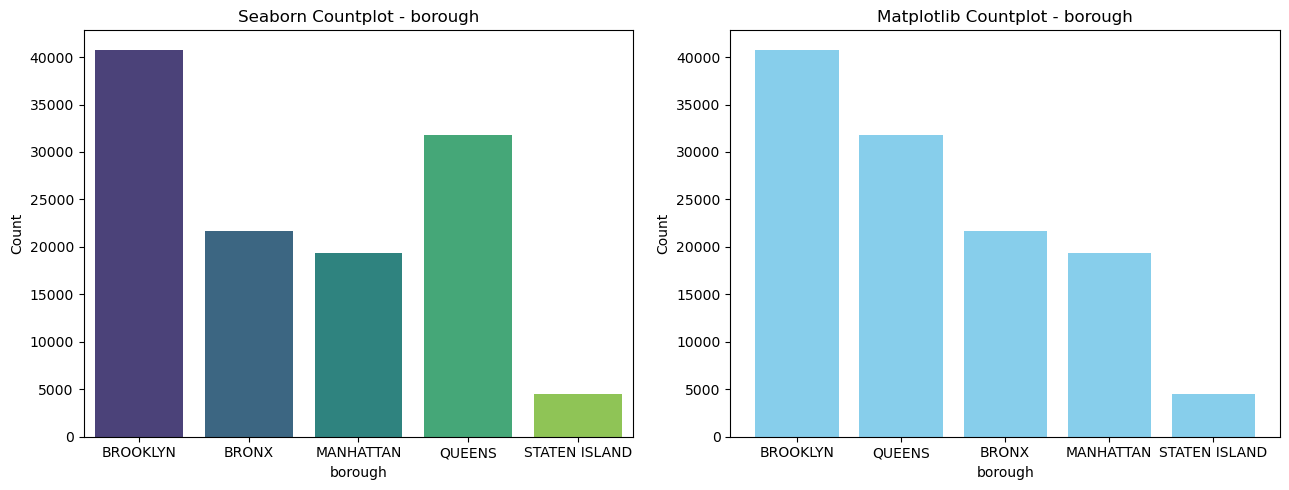

In [15]:
print(data['borough'].describe())
# Using Seaborn
plt.figure(figsize=(13, 5))
plt.subplot(1, 2, 1)
sns.countplot(x=data['borough'], palette='viridis')
plt.title('Seaborn Countplot - borough')
plt.xlabel('borough')
plt.ylabel('Count')

# Using Matplotlib
plt.subplot(1, 2, 2)
value_counts = data['borough'].value_counts()
plt.bar(value_counts.index, value_counts, color='skyblue')
plt.title('Matplotlib Countplot - borough')
plt.xlabel('borough')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

From the above data it is found that there are 5 unique values in the Borough  attribute.Which says that there are 5 different borough are present.

In [16]:
data['on_street_name'].describe()

count           131006
unique            7726
top       BELT PARKWAY
freq              2354
Name: on_street_name, dtype: object

from the above data it is found that there are 7727 unique streets involved in crash in New York City.

count    180030.000000
mean          0.478787
std           0.802433
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          40.000000
Name: number_of_persons_injured, dtype: float64


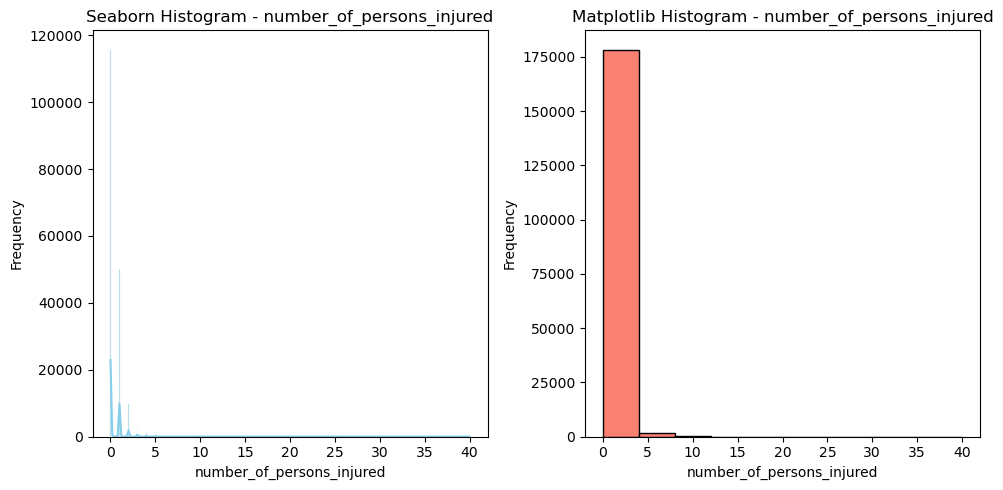

In [17]:
data['number_of_persons_injured']=data['number_of_persons_injured'].astype(int)
print(data['number_of_persons_injured'].describe())
# Using Seaborn
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['number_of_persons_injured'], kde=True, color='skyblue')
plt.title('Seaborn Histogram - number_of_persons_injured')
plt.xlabel('number_of_persons_injured')
plt.ylabel('Frequency')

# Using Matplotlib
plt.subplot(1, 2, 2)
plt.hist(data['number_of_persons_injured'], bins=10, color='salmon', edgecolor='black')
plt.title('Matplotlib Histogram - number_of_persons_injured')
plt.xlabel('number_of_persons_injured')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

We have total 180030 observations and from the above statistical data we can observe that the average no of persons injured in the crashes is 1 person per two crashes.From the above distribution, we can say that mostly number of persons injured were falling in the bin of 0 - 5.

count    180030.00000
mean          0.00265
std           0.05373
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max           3.00000
Name: number_of_persons_killed, dtype: float64


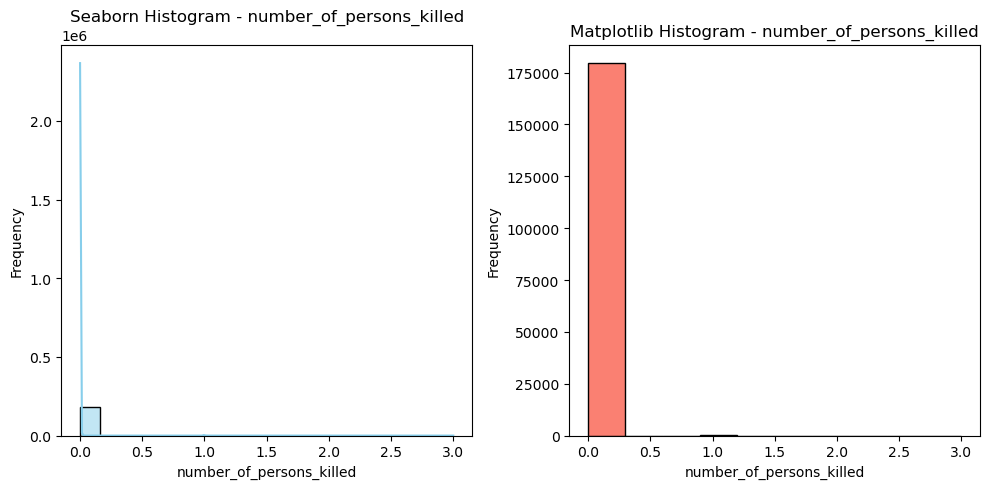

In [18]:
data['number_of_persons_killed']=data['number_of_persons_killed'].astype(int)
#here we can find the average and std deviation min and max no of people can be killed per a crash as below
print(data['number_of_persons_killed'].describe())

# Using Seaborn
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['number_of_persons_killed'], kde=True, color='skyblue')
plt.title('Seaborn Histogram - number_of_persons_killed')
plt.xlabel('number_of_persons_killed')
plt.ylabel('Frequency')

# Using Matplotlib
plt.subplot(1, 2, 2)
plt.hist(data['number_of_persons_killed'], bins=10, color='salmon', edgecolor='black')
plt.title('Matplotlib Histogram - number_of_persons_killed')
plt.xlabel('number_of_persons_killed')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

From the above distribution we can say that the maximum number of people killed per crash is 3 people.

In [19]:
#now lets convert the Crash date into a date data type
data['crash_date'] = pd.to_datetime(data['crash_date'])
print(data.dtypes)

crash_date                       datetime64[ns]
crash_time                               object
on_street_name                           object
number_of_persons_injured                 int32
number_of_persons_killed                  int32
number_of_pedestrians_injured            object
number_of_pedestrians_killed             object
number_of_cyclist_injured                object
number_of_cyclist_killed                 object
number_of_motorist_injured               object
number_of_motorist_killed                object
contributing_factor_vehicle_1            object
collision_id                             object
vehicle_type_code1                       object
borough                                  object
dtype: object


In the below step we extract the day month and year from the crash date attribute and also changed to its respective month day names to make easier to analyse the data well.

In [20]:
import calendar
#Exctracting the year, month, day to analyse the seasonal and temporal time analysis of crashes
data['Day'] = data['crash_date'].dt.day
data['Month'] = data['crash_date'].dt.month
data['Year'] = data['crash_date'].dt.year

# Map month and day numbers to their names without using map
data['Month'] = [calendar.month_name[x] for x in data['Month']]
data['Day'] = [calendar.day_name[x % 7] for x in data['Day']]  # % 7 to handle Sunday as the first day


data.head()

,crash_date,crash_time,on_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,collision_id,vehicle_type_code1,borough,Day,Month,Year
0,2021-09-11,2:39,WHITESTONE EXPRESSWAY,2,0,0,0,0,0,2,0,Aggressive Driving/Road Rage,4455765,Sedan,NaN,Friday,September,2021
1,2022-03-26,11:45,QUEENSBORO BRIDGE UPPER,1,0,0,0,0,0,1,0,Pavement Slippery,4513547,Sedan,NaN,Saturday,March,2022
2,2022-06-29,6:55,THROGS NECK BRIDGE,0,0,0,0,0,0,0,0,Following Too Closely,4541903,Sedan,NaN,Tuesday,June,2022
3,2021-09-11,9:35,NaN,0,0,0,0,0,0,0,0,Unspecified,4456314,Sedan,BROOKLYN,Friday,September,2021
4,2021-12-14,8:13,SARATOGA AVENUE,0,0,0,0,0,0,0,0,NaN,4486609,NaN,BROOKLYN,Monday,December,2021


### EDA - No of Crashes by Year
First I will get summary statistics on the attribute Year. Then, since Year is an ordinal variable, I will generate bar plots using both Matplotlib and Seaborn.

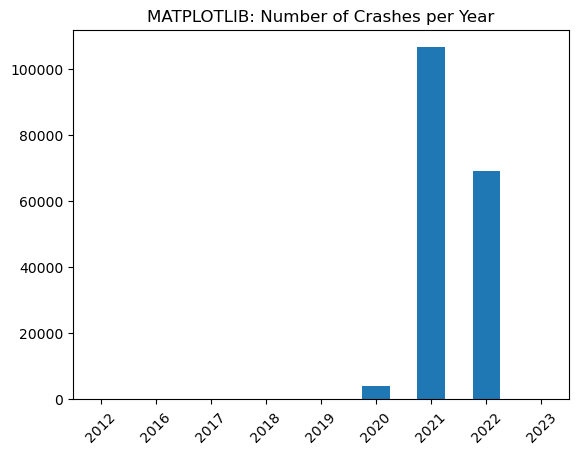

<Axes: title={'center': 'SEABORN: Number of Crashes per Year'}, xlabel='Year', ylabel='count'>

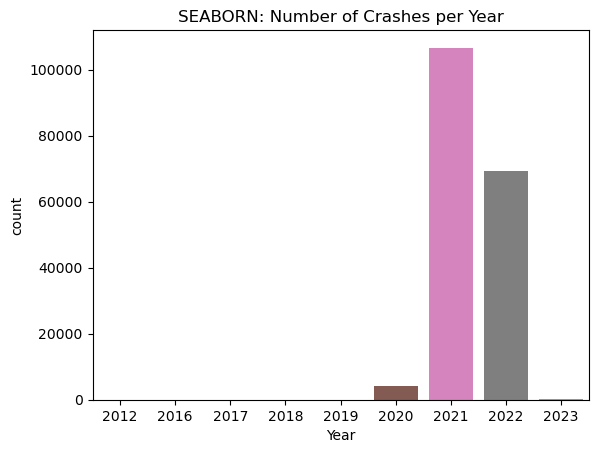

In [21]:
#bar plot for year with matplot lib
year_bar_plot = data['Year'].value_counts().sort_index().plot(kind = 'bar')
#set the title of the bar plot
year_bar_plot.set_title('MATPLOTLIB: Number of Crashes per Year')
year_bar_plot.set_xticklabels(year_bar_plot.get_xticklabels(), rotation=45)

#show the plot
plt.show()

#Now I will create the same bar plot but using Seaborn
#Seaborn has a built in countplot function that does the counting and plot the data
year_bar_plot = sns.countplot(x="Year",data=data)
year_bar_plot.set_title('SEABORN: Number of Crashes per Year')

#show the bar/count plot
year_bar_plot


### Findings
From the above graphs it was evident that a large no of crashes happened during 2021.

### EDA - No of crashes by Month

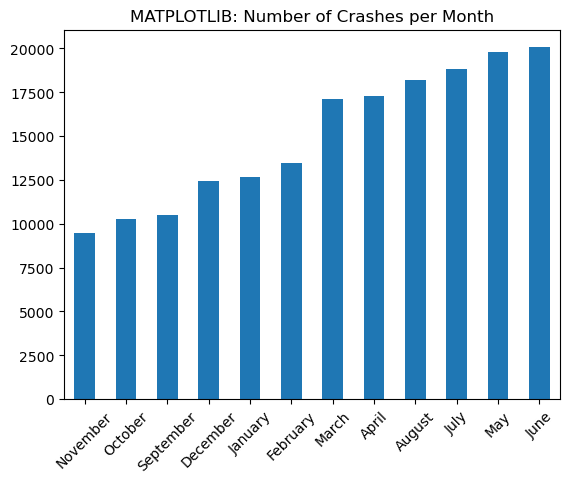

<Axes: title={'center': 'SEABORN: Number of Crashes per Month'}, xlabel='Month', ylabel='count'>

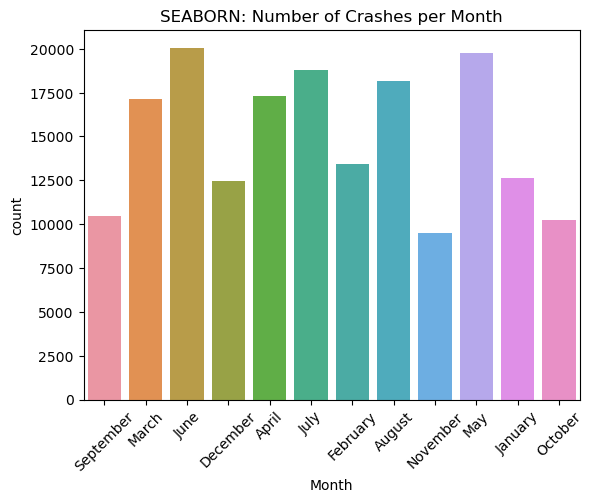

In [22]:
#bar plot for Month with matplot lib
month_bar_plot = data['Month'].value_counts().sort_values().plot(kind = 'bar')
#set the title of the bar plot
month_bar_plot.set_title('MATPLOTLIB: Number of Crashes per Month')
month_bar_plot.set_xticklabels(month_bar_plot.get_xticklabels(), rotation=45)
#show the plot
plt.show()

#Now I will create the same bar plot but using Seaborn
#Seaborn has a built in countplot function that does the counting and plot the data
month_bar_plot=sns.countplot(x='Month', data=data)
month_bar_plot.set_title('SEABORN: Number of Crashes per Month')
month_bar_plot.set_xticklabels(month_bar_plot.get_xticklabels(), rotation=45)

#show the bar/count plot
month_bar_plot


#### Findings:
As per the above plots it was evident that June marks the highest and then follwed by May . To be specific Quater 4 has the least no of crashes.The reason behind this may be that as it was a winter season people are less tend to travel leading to less no of crashes.

### EDA - Crashes by Day

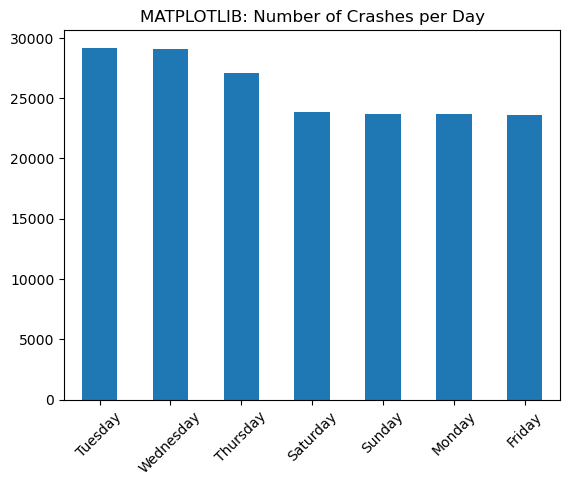

<Axes: title={'center': 'SEABORN: Number of Crashes per Day'}, xlabel='Day', ylabel='count'>

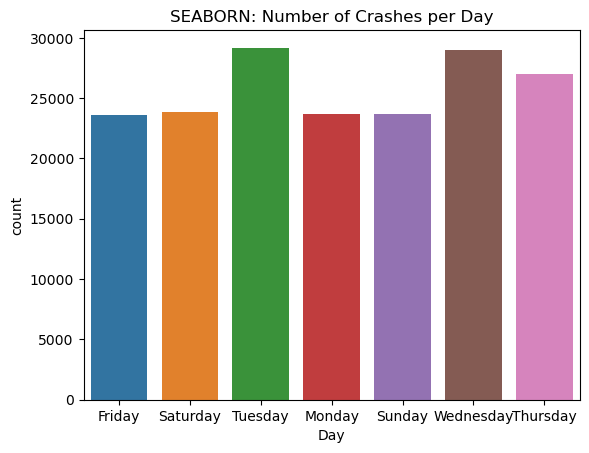

In [23]:
#bar plot for day with matplot lib
day_bar_plot = data['Day'].value_counts().plot(kind = 'bar')
#set the title of the bar plot
day_bar_plot.set_title('MATPLOTLIB: Number of Crashes per Day')
day_bar_plot.set_xticklabels(day_bar_plot.get_xticklabels(), rotation=45)

#show the plot
plt.show()

#Now I will create the same bar plot but using Seaborn
#Seaborn has a built in countplot function that does the counting and plot the data
day_bar_plot = sns.countplot(x="Day",data=data)
day_bar_plot.set_title('SEABORN: Number of Crashes per Day')
#show the bar/count plot
day_bar_plot

#### Findings:
From the above plots It is evident that Tuesday marks the highest crashes day followed by wednesday and Thursday with slight difference.

### EDA - Crashes by Borough

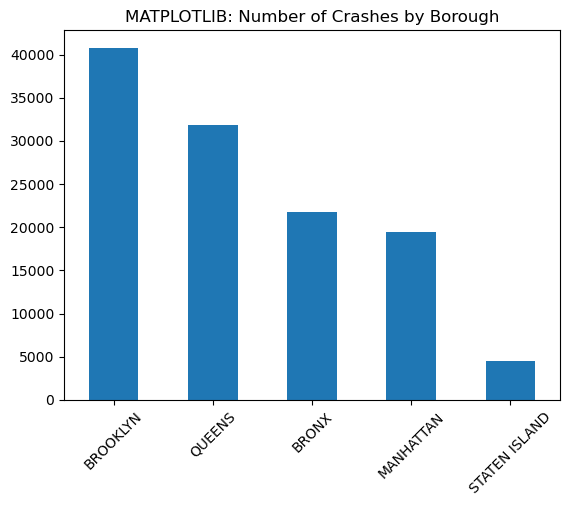

<Axes: title={'center': 'SEABORN: Number of Crashes by Borough'}, xlabel='count', ylabel='borough'>

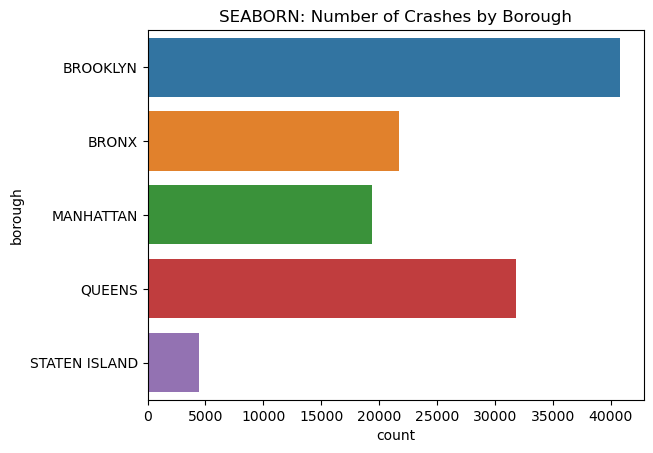

In [24]:
#Matplotlib bar plot for the Number of Crashes by Borough
#plt.gcf().set_size_inches(8, 5)
borough = data['borough'].value_counts().plot(kind = 'bar')
borough.set_title('MATPLOTLIB: Number of Crashes by Borough')
borough.set_xticklabels(borough.get_xticklabels(), rotation=45)

plt.show()

#plt.gcf().set_size_inches(10, 15)
#Seaboarn bar plot for the Number of Crashes by Borough
borough = sns.countplot(y="borough",data=data)
borough.set_title('SEABORN: Number of Crashes by Borough')
borough

### Findings

Based on the data shown above, it is obvious that Brooklyn stood at first place for happening most crashes followed by Queens and STATEN ISLAND beinhg the least and indicating the safe place in terms of travelling.

### EDA - Crashes by  Street


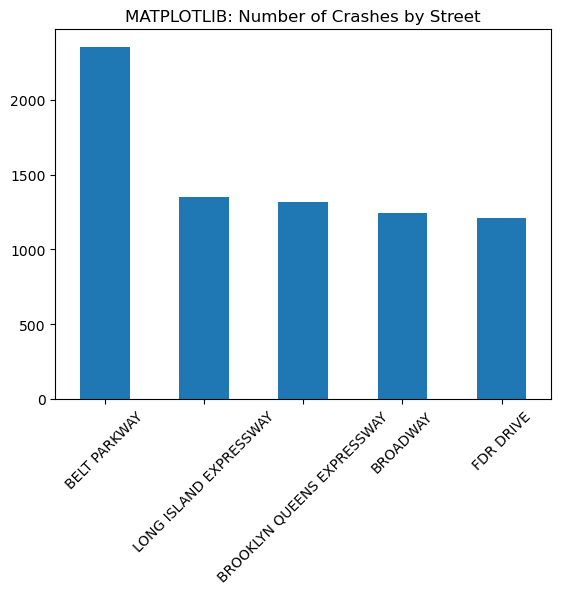

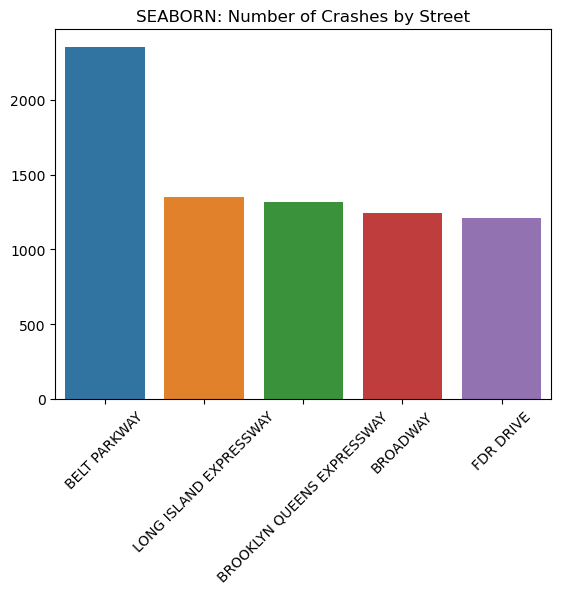

In [25]:
#Matplotlib bar plot for the Number of Crashes by Street

street = data['on_street_name'].value_counts().head().plot(kind = 'bar')
street.set_title('MATPLOTLIB: Number of Crashes by Street')
street.set_xticklabels(street.get_xticklabels(), rotation=45)

plt.show()




#Seaboarn bar plot for the Number of Crashes by Street
streets = data["on_street_name"].value_counts().head(5)
streeti = sns.barplot(x=streets.index, y=streets.values)
streeti.set_title('SEABORN: Number of Crashes by Street')
streeti.set_xticklabels(streeti.get_xticklabels(), rotation=45)
plt.show()

#### Findings:
As there were very large number of street Here I displayed only top 5 streets of having large number of crashes.Belt parkway experience the most no of vehicle crashes follwed by long island express highway.

### EDA - No of Injuries by Month and Day

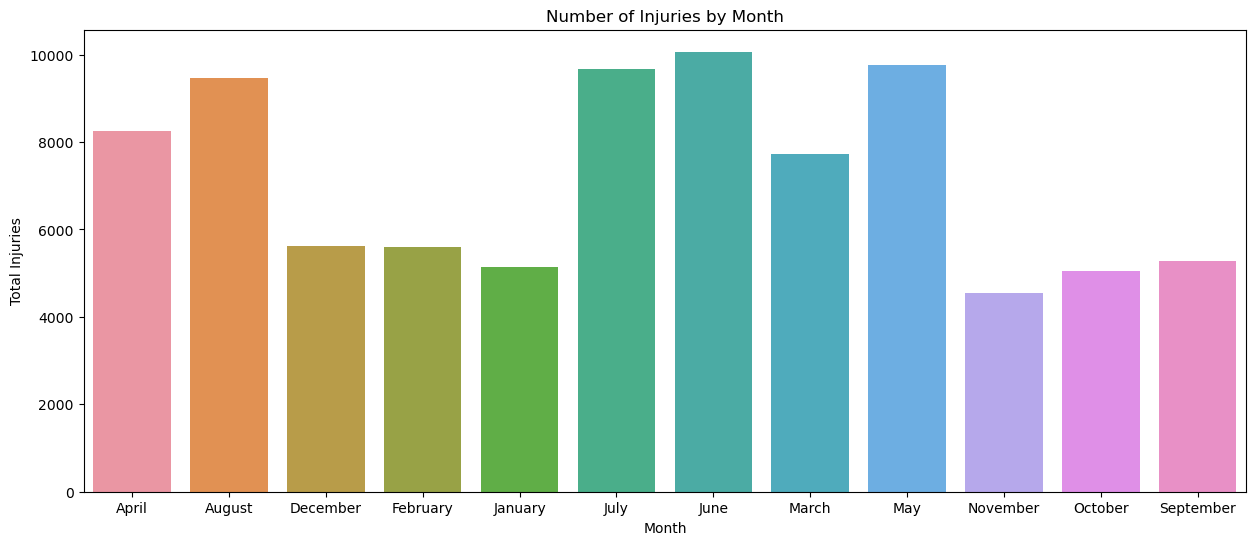

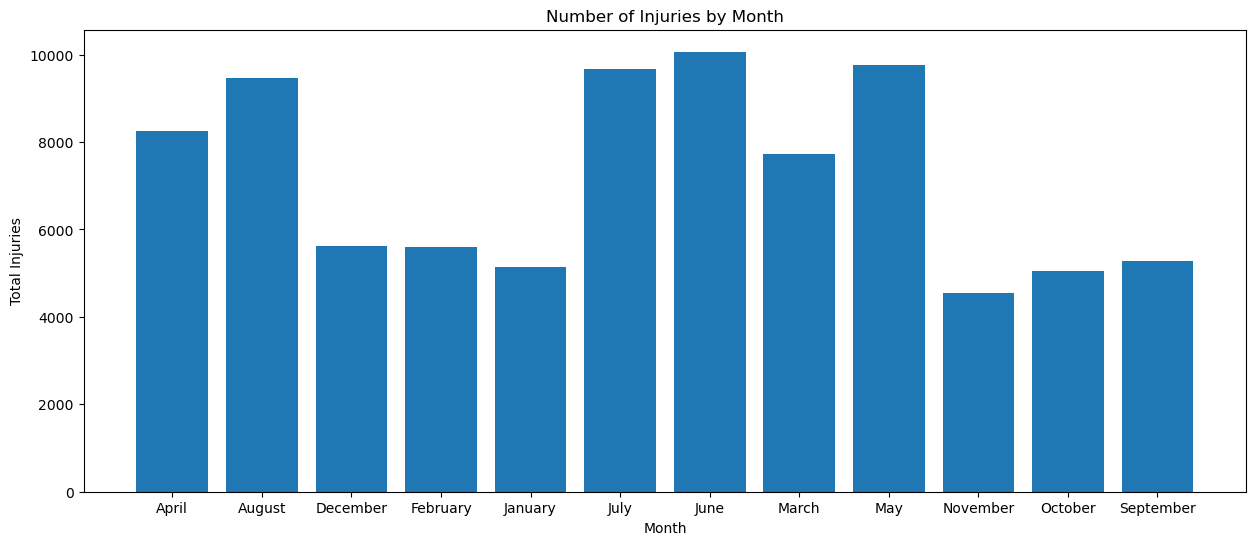

In [26]:
#converting the string to integer data type for the column number of persons injured
data["number_of_persons_injured"]=data["number_of_persons_injured"].astype(int)
monthly_injuries = data.groupby("Month")["number_of_persons_injured"].sum().reset_index()

# Create the bar plot using seaborn
plt.figure(figsize=(15, 6))
sns.barplot(x="Month", y="number_of_persons_injured", data=monthly_injuries)
plt.title("Number of Injuries by Month")
plt.xlabel("Month")
plt.ylabel("Total Injuries")
plt.show()

#using matplotlib
plt.figure(figsize=(15, 6))  # Set the figure size
plt.bar(monthly_injuries["Month"], monthly_injuries["number_of_persons_injured"])
plt.title("Number of Injuries by Month")
plt.xlabel("Month")
plt.ylabel("Total Injuries")
plt.show()


June and July months experience the most number of people got injured

### EDA - Deaths by Day

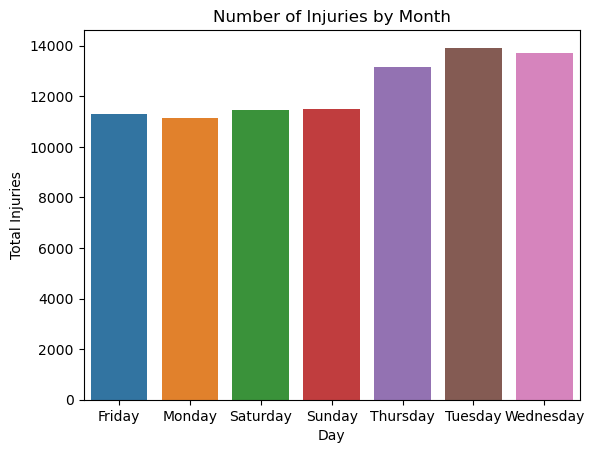

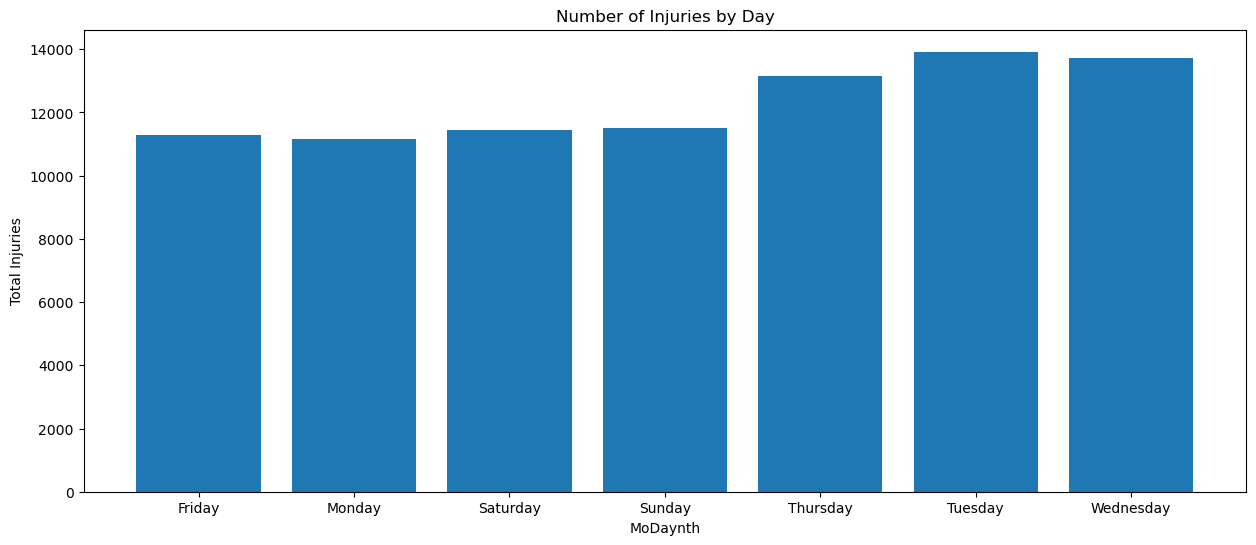

In [27]:
day_injuries = data.groupby("Day")["number_of_persons_injured"].sum().reset_index()

# Create the bar plot using seaborn
sns.barplot(x="Day", y="number_of_persons_injured", data=day_injuries)
plt.title("Number of Injuries by Month")
plt.xlabel("Day")
plt.ylabel("Total Injuries")
plt.show()

#using matplotlib
plt.figure(figsize=(15, 6))  # Set the figure size
plt.bar(day_injuries["Day"], day_injuries["number_of_persons_injured"])
plt.title("Number of Injuries by Day")
plt.xlabel("MoDaynth")
plt.ylabel("Total Injuries")
plt.show()

### Findings

From the above plots Tuesday and Wednesday has the highest no of injuries in a week but all are having slight difference.

### EDA - Deaths by Month and Day


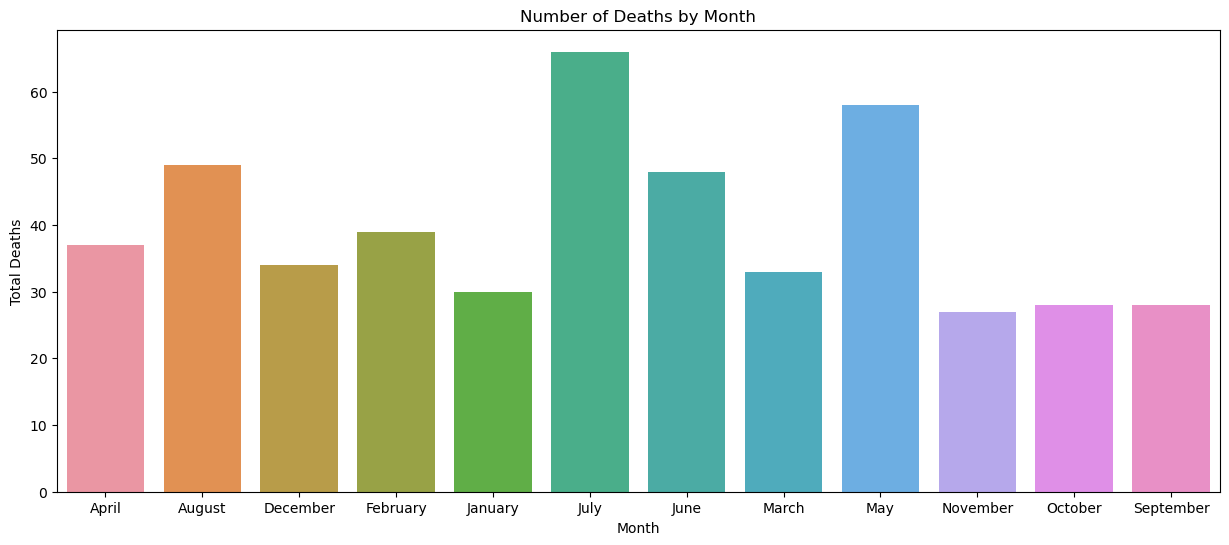

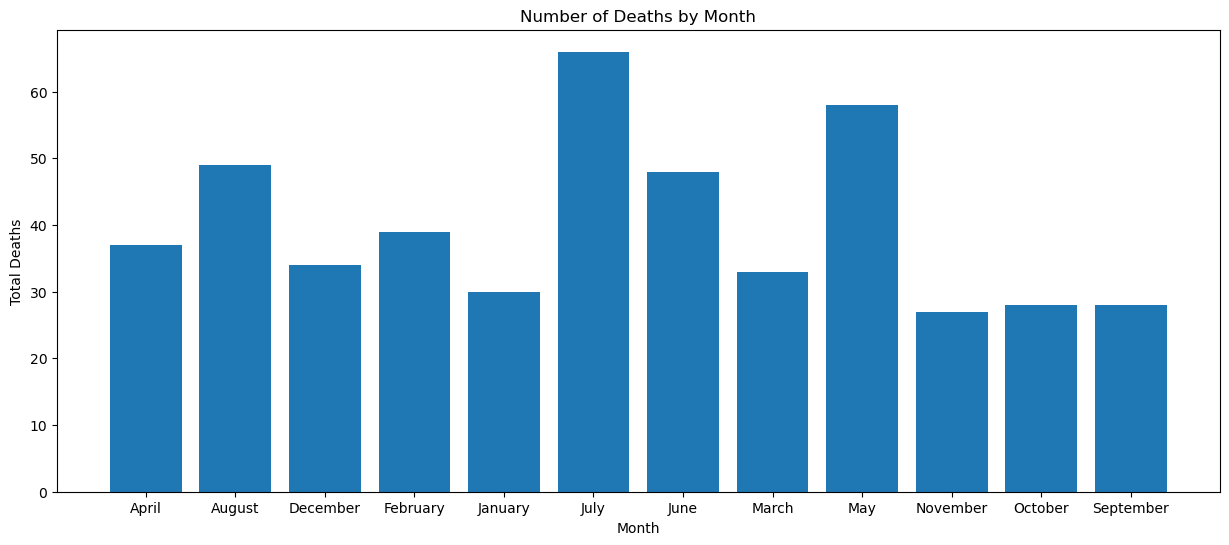

In [28]:
data['number_of_persons_killed']=data['number_of_persons_killed'].astype(int)
monthly_deaths = data.groupby("Month")["number_of_persons_killed"].sum().reset_index()

# Create the bar plot using seaborn
plt.figure(figsize=(15, 6))
sns.barplot(x="Month", y="number_of_persons_killed", data=monthly_deaths)
plt.title("Number of Deaths by Month")
plt.xlabel("Month")
plt.ylabel("Total Deaths")
plt.show()

#using matplotlib
plt.figure(figsize=(15, 6))  # Set the figure size
plt.bar(monthly_deaths["Month"], monthly_deaths["number_of_persons_killed"])
plt.title("Number of Deaths by Month")
plt.xlabel("Month")
plt.ylabel("Total Deaths")
plt.show()


As earlier July has most no of deaths and the months of last quarter i.e.,October, November and December and september also stood at least no of deaths.

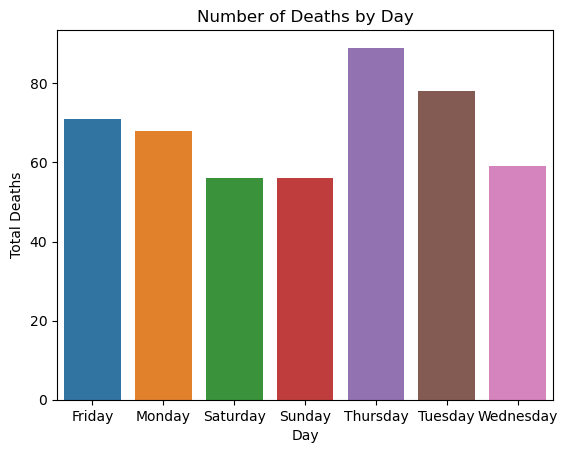

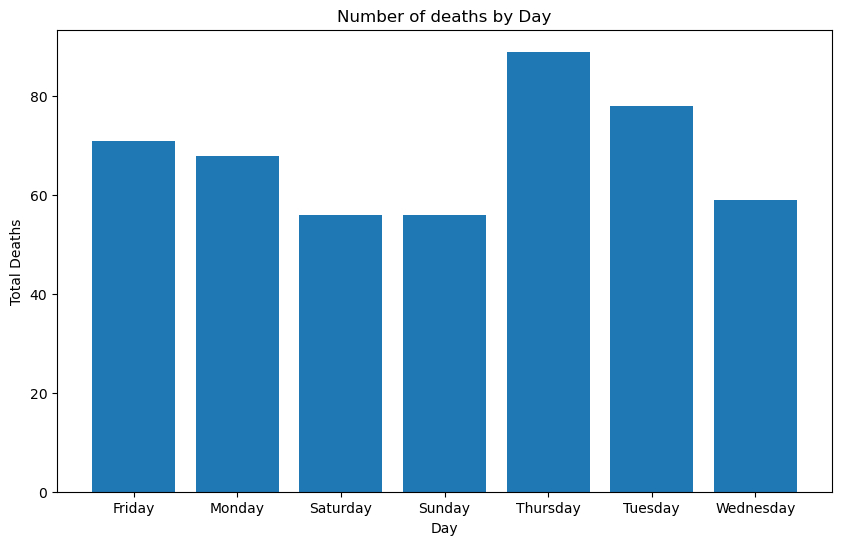

In [29]:
day_deaths = data.groupby("Day")["number_of_persons_killed"].sum().reset_index()

# Create the bar plot using seaborn
sns.barplot(x="Day", y="number_of_persons_killed", data=day_deaths)
plt.title("Number of Deaths by Day")
plt.xlabel("Day")
plt.ylabel("Total Deaths")
plt.show()

#using matplotlib
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(day_deaths["Day"], day_deaths["number_of_persons_killed"])
plt.title("Number of deaths by Day")
plt.xlabel("Day")
plt.ylabel("Total Deaths")
plt.show()

From the above plots, it is evedent that weekdays Thursday has highest number of deaths followed by the Tuesday.

### EDA - Cause of the Crash

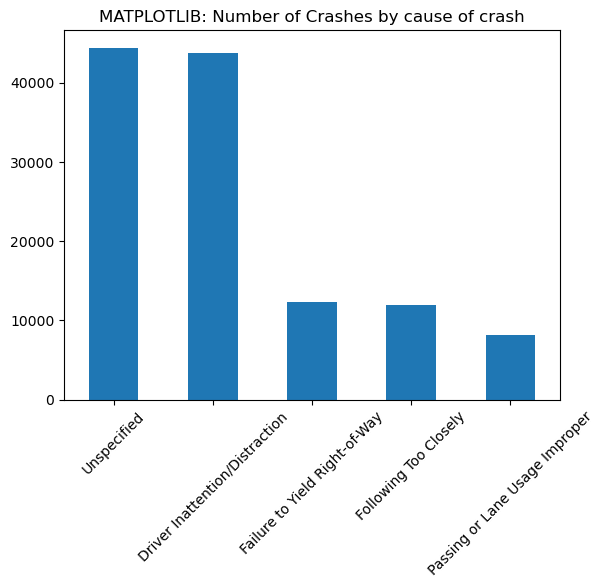

<Axes: title={'center': 'SEABORN: Number of Crashes by cause of crash'}>

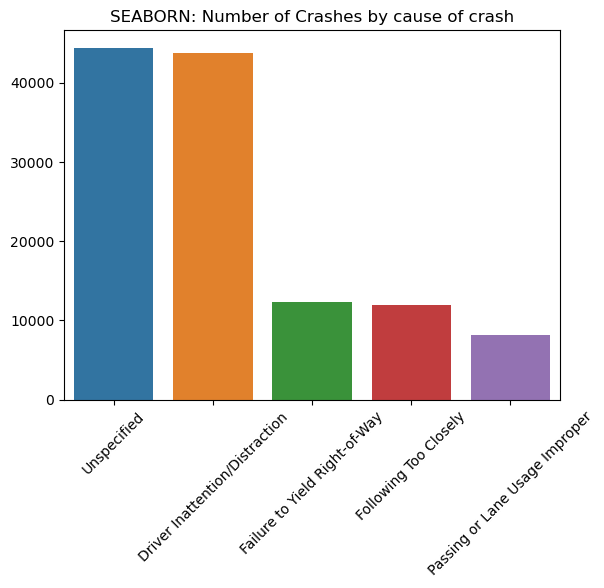

In [30]:
#Matplotlib bar plot for the Number of Crashes by Cause of crash
cause = data['contributing_factor_vehicle_1'].value_counts().head().plot(kind = 'bar')
cause.set_title('MATPLOTLIB: Number of Crashes by cause of crash')
cause.set_xticklabels(cause.get_xticklabels(), rotation=45)

plt.show()

#Seaboarn bar plot for the Number of Crashes by Borough
cause = data['contributing_factor_vehicle_1'].value_counts().head()
cause = sns.barplot(x=cause.index,y=cause.values)
cause.set_title('SEABORN: Number of Crashes by cause of crash')
cause.set_xticklabels(cause.get_xticklabels(), rotation=45)

cause

#### Findings

As there are large number of causes and unable to read from a messy visual I have shown top 5 causes in the plot.Driver Inattention/ Distraction is the main reason for the crashes if we set aside the unspecified reason.

### EDA - Crashes by Time of the day

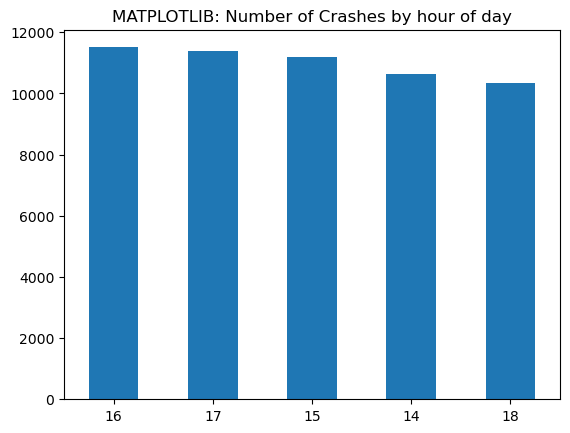

<Axes: title={'center': 'SEABORN: Number of Crashes by hpour of day'}>

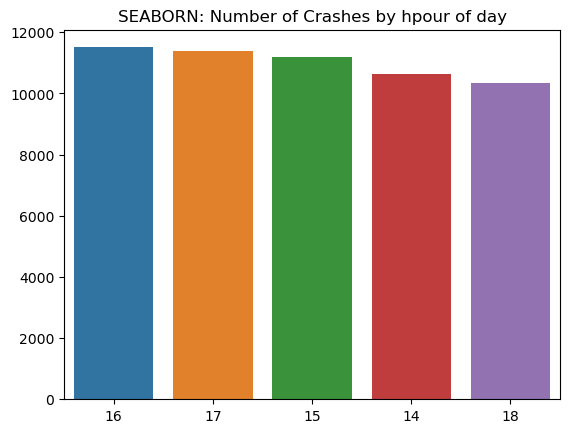

In [31]:
# as we have crash time first we convert into a integer so that it will get round of to the hour
data["crash_time"]=data["crash_time"].str.split(":",expand=True)[0]

#Matplotlib bar plot for the Number of Crashes by hour of day
hour = data['crash_time'].value_counts().head().plot(kind = 'bar')
hour.set_title('MATPLOTLIB: Number of Crashes by hour of day')
hour.set_xticklabels(hour.get_xticklabels(), rotation=0)


plt.show()

#Seaboarn bar plot for the Number of Crashes by hour of the day
hour = data['crash_time'].value_counts().head()
hour = sns.barplot(x=hour.index,y=hour.values)
hour.set_title('SEABORN: Number of Crashes by hpour of day')
hour

#### Findings:
From the above plot it is very interesting to observe that all the crashes has happened from 2pm to 6pm .

##EDA -Deaths by Borough

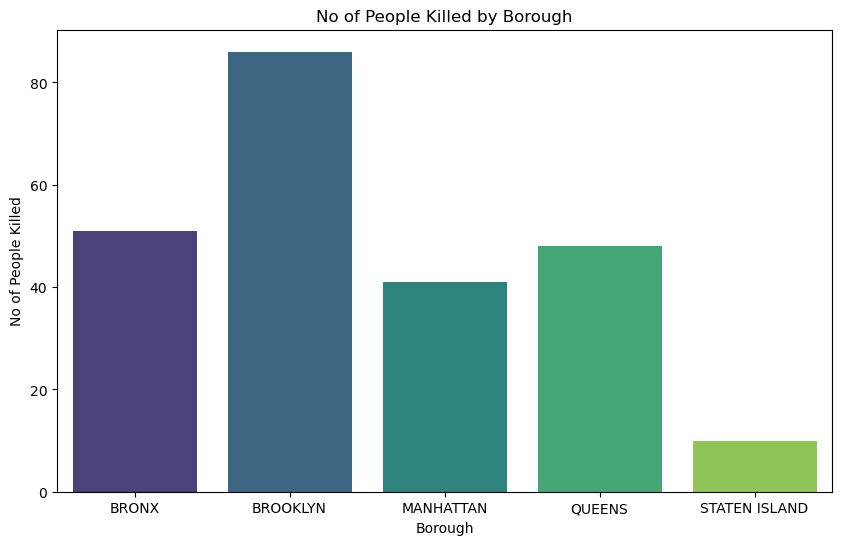

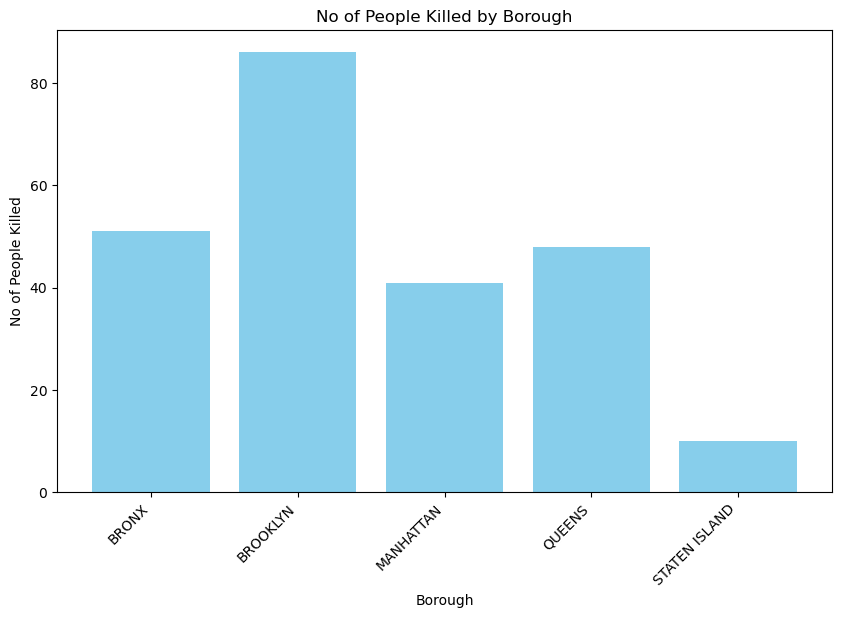

In [32]:

# Calculate the total sum of people killed in each borough
borough_totals = data.groupby('borough')['number_of_persons_killed'].sum().reset_index()

# Create a bar plot with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='borough', y='number_of_persons_killed', data=borough_totals, palette='viridis')
plt.title('No of People Killed by Borough')
plt.xlabel('Borough')
plt.ylabel('No of People Killed')
plt.show()

# Create a bar plot with Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(borough_totals['borough'], borough_totals['number_of_persons_killed'], color='skyblue')
plt.title('No of People Killed by Borough')
plt.xlabel('Borough')
plt.ylabel('No of People Killed')
plt.xticks(rotation=45, ha='right')
plt.show()

Brooklyn has more number of deaths followed by the Bronx.Staten Island is the borough with the least number of deaths.

### EDA - Deaths by Cause

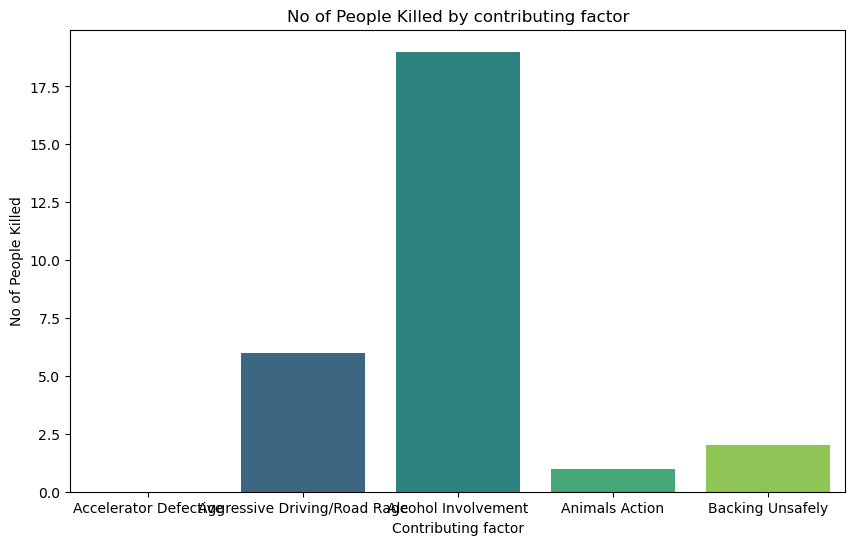

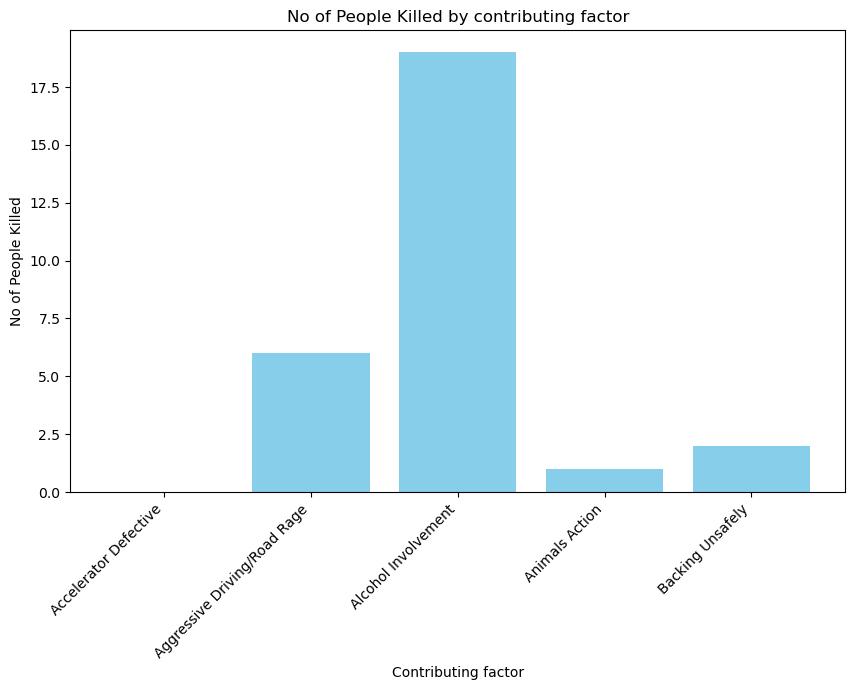

In [33]:


# Calculate the total sum of people killed in each borough
borough_totals = data.groupby('contributing_factor_vehicle_1')['number_of_persons_killed'].sum().reset_index().head()

# Create a bar plot with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='contributing_factor_vehicle_1', y='number_of_persons_killed', data=borough_totals, palette='viridis')
plt.title('No of People Killed by contributing factor')
plt.xlabel('Contributing factor')
plt.ylabel('No of People Killed')
plt.show()

# Create a bar plot with Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(borough_totals['contributing_factor_vehicle_1'], borough_totals['number_of_persons_killed'], color='skyblue')
plt.title('No of People Killed by contributing factor')
plt.xlabel('Contributing factor')
plt.ylabel('No of People Killed')
plt.xticks(rotation=45, ha='right')
plt.show()

More number of people were killed because of the Alcohol involvement followed by the Aggressive driving.

### Injuries v/s Deaths

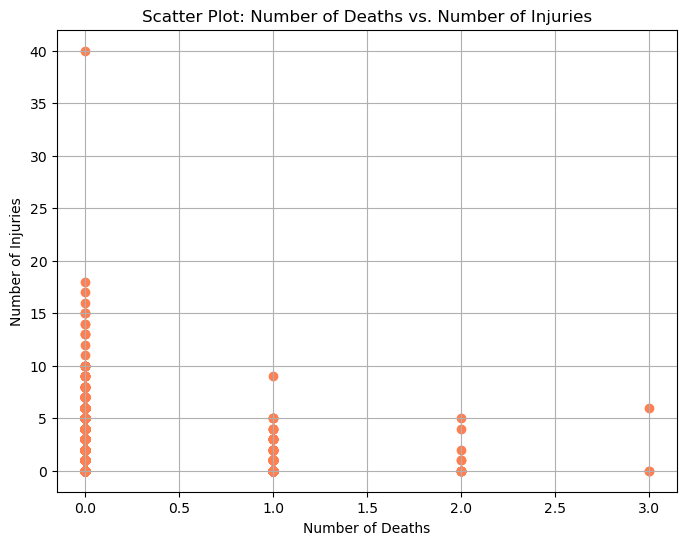

In [34]:
# Create a scatter plot with Matplotlib
plt.figure(figsize=(8, 6))
plt.scatter(data['number_of_persons_killed'].astype(int), data['number_of_persons_injured'].astype(int), color='coral')
plt.title('Scatter Plot: Number of Deaths vs. Number of Injuries')
plt.xlabel('Number of Deaths')
plt.ylabel('Number of Injuries')
plt.grid(True)
plt.show()

## <font color="red">4.Inference
</font>

Now that we've completed the Exploratory Data Analysis we'll perform the analysis required to answer the research question. For any visualizations necessary, I will create the graphic using both Matplotlib and Seaborn.




1. **What are the temporal trends in motor vehicle crashes over time? Are there specific times of the day, days of the week, or months with higher accident rates?**

Ans : From the EDA I can conclude that, More number of crashes has occured in the months of May, June and July. To be specific all the months in first 3 quaters have more no of crashes with less varying in number, but the months of last quarter that is October, November and December having a very less number of crashes. So we can observe a strong seasonality across the months of a year. In the similar way we can see very little seasonilty across the days of the week, Tuesday and wednesday has he highest number of  crashes, even they vary with very lesser number of crashes.And we have more crashes  from 2pm to 6pm

---


In [35]:
#crashes by month
data['Month'].value_counts()

June         20071
May          19778
July         18809
August       18182
April        17296
March        17111
February     13452
January      12658
December     12450
September    10487
October      10257
November      9479
Name: Month, dtype: int64

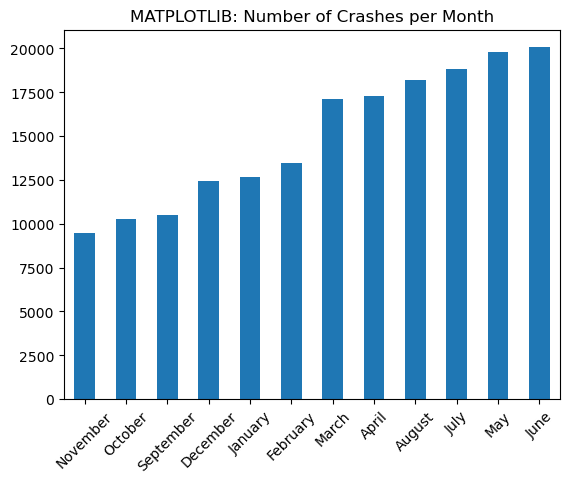

<Axes: title={'center': 'SEABORN: Number of Crashes per Month'}, xlabel='Month', ylabel='count'>

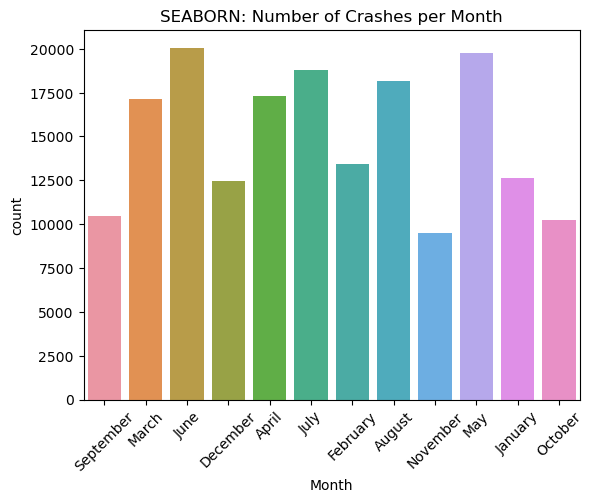

In [36]:
#bar plot for Month with matplot lib
month_bar_plot = data['Month'].value_counts().sort_values().plot(kind = 'bar')
#set the title of the bar plot
month_bar_plot.set_title('MATPLOTLIB: Number of Crashes per Month')
month_bar_plot.set_xticklabels(month_bar_plot.get_xticklabels(), rotation=45)
#show the plot
plt.show()

#Now I will create the same bar plot but using Seaborn
#Seaborn has a built in countplot function that does the counting and plot the data
month_bar_plot=sns.countplot(x='Month', data=data)
month_bar_plot.set_title('SEABORN: Number of Crashes per Month')
month_bar_plot.set_xticklabels(month_bar_plot.get_xticklabels(), rotation=45)

#show the bar/count plot
month_bar_plot


In [37]:
#crashes by day
data['Day'].value_counts()

Tuesday      29178
Wednesday    29020
Thursday     27029
Saturday     23837
Sunday       23706
Monday       23683
Friday       23577
Name: Day, dtype: int64

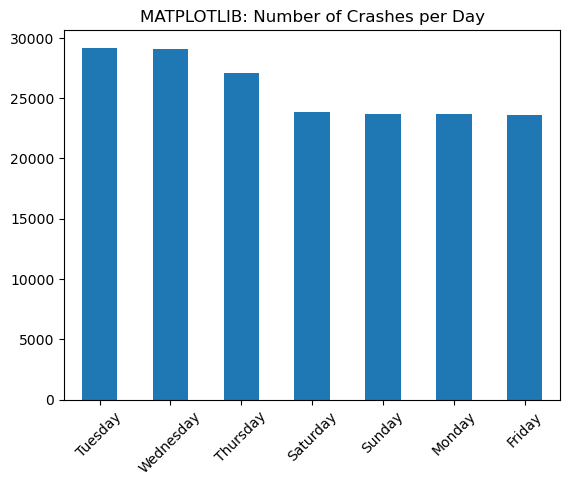

<Axes: title={'center': 'SEABORN: Number of Crashes per Day'}, xlabel='Day', ylabel='count'>

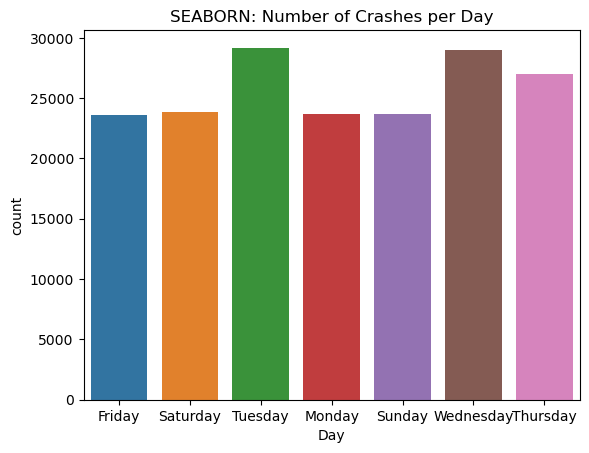

In [38]:
#bar plot for day with matplot lib
day_bar_plot = data['Day'].value_counts().plot(kind = 'bar')
#set the title of the bar plot
day_bar_plot.set_title('MATPLOTLIB: Number of Crashes per Day')
day_bar_plot.set_xticklabels(day_bar_plot.get_xticklabels(), rotation=45)

#show the plot
plt.show()

#Now I will create the same bar plot but using Seaborn
#Seaborn has a built in countplot function that does the counting and plot the data
day_bar_plot = sns.countplot(x="Day",data=data)
day_bar_plot.set_title('SEABORN: Number of Crashes per Day')
#show the bar/count plot
day_bar_plot

In [39]:
#crashes by time of the day
data['crash_time'].value_counts()

16    11510
17    11388
15    11191
14    10632
18    10353
13     9314
12     9056
19     8856
8      8801
11     8436
0      8213
9      7953
10     7847
20     7669
21     7132
22     6806
23     6340
7      5943
6      4651
1      4380
2      3567
5      3429
4      3369
3      3194
Name: crash_time, dtype: int64

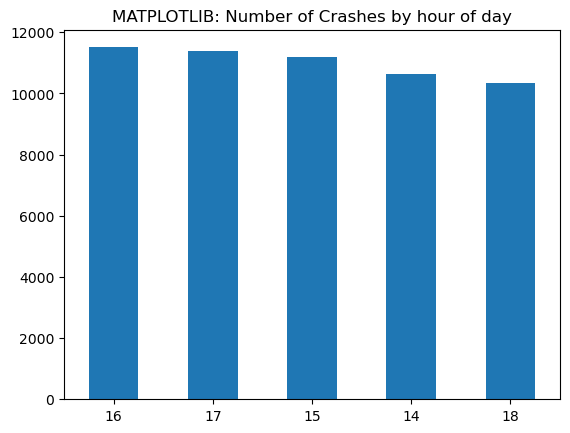

<Axes: title={'center': 'SEABORN: Number of Crashes by hour of day'}>

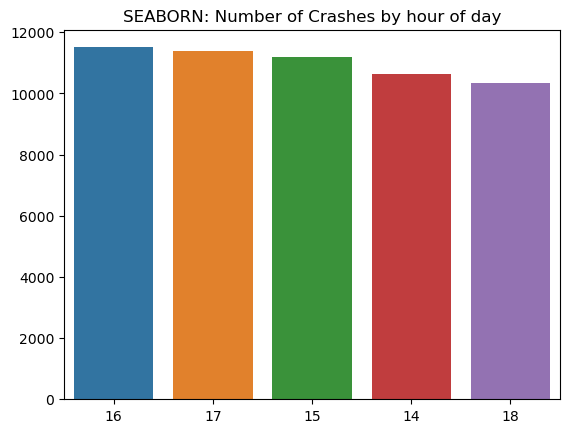

In [40]:
# as we have crash time first we convert into a integer so that it will get round of to the hour
data["crash_time"]=data["crash_time"].str.split(":",expand=True)[0]

#Matplotlib bar plot for the Number of Crashes by hour of day
hour = data['crash_time'].value_counts().head().plot(kind = 'bar')
hour.set_title('MATPLOTLIB: Number of Crashes by hour of day')
hour.set_xticklabels(hour.get_xticklabels(), rotation=0)


plt.show()

#Seaboarn bar plot for the Number of Crashes by hour of the day
hour = data['crash_time'].value_counts().head()
hour = sns.barplot(x=hour.index,y=hour.values)
hour.set_title('SEABORN: Number of Crashes by hour of day')
hour


2. **Is there a correlation between the time of day and the severity of crashes (i.e., more fatalities during certain hours)?**

Ans : Interesting there is a strong relation between the time of the day and the crashes. From EDA I found that mostly crashes has been happened only from 2pm to 7pm.

---


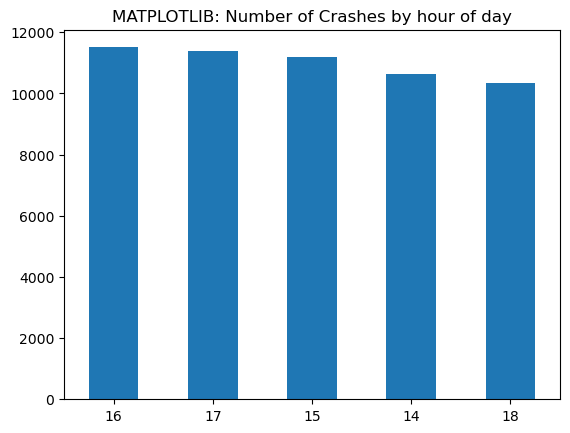

<Axes: title={'center': 'SEABORN: Number of Crashes by hpour of day'}>

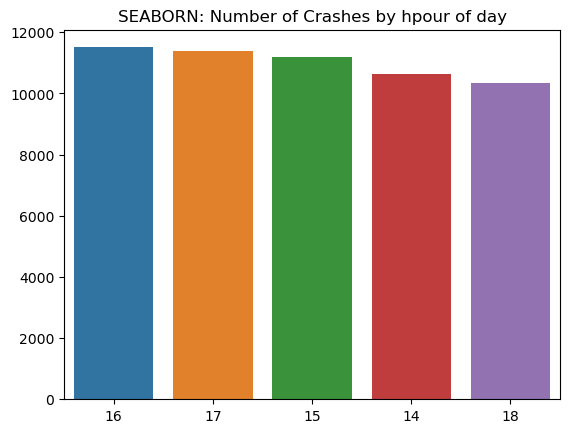

In [41]:
# as we have crash time first we convert into a integer so that it will get round of to the hour
data["crash_time"]=data["crash_time"].str.split(":",expand=True)[0]

#Matplotlib bar plot for the Number of Crashes by hour of day
hour = data['crash_time'].value_counts().head().plot(kind = 'bar')
hour.set_title('MATPLOTLIB: Number of Crashes by hour of day')
hour.set_xticklabels(hour.get_xticklabels(), rotation=0)


plt.show()

#Seaboarn bar plot for the Number of Crashes by hour of the day
hour = data['crash_time'].value_counts().head()
hour = sns.barplot(x=hour.index,y=hour.values)
hour.set_title('SEABORN: Number of Crashes by hpour of day')
hour

3. **Where are the most dangerous locations for motor vehicle crashes? Can we identify high-risk areas?**

Ans : Brroklyn, Queens , Manhattan and Bronx are the dangerous and high risk areas among the boroughs.In streets, Broadway, Atlantic and 3rd Avuenue are risky areas.

---


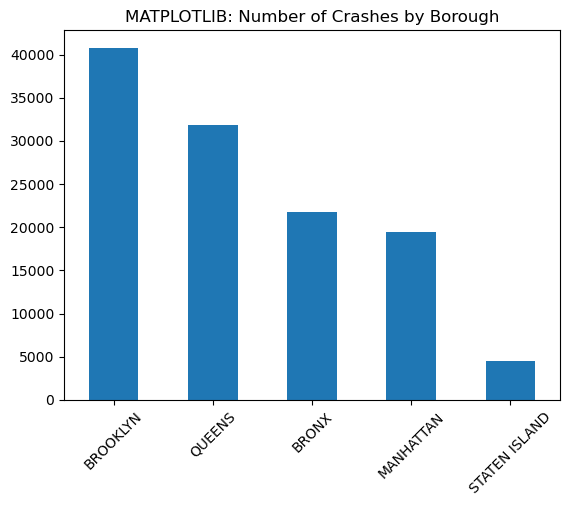

<Axes: title={'center': 'SEABORN: Number of Crashes by Borough'}, xlabel='count', ylabel='borough'>

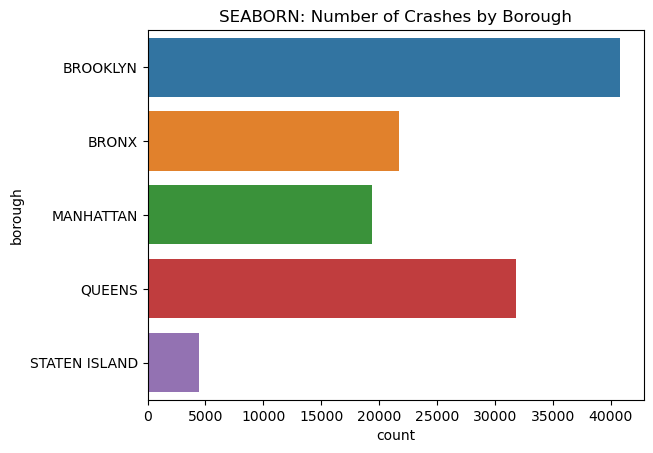

In [42]:
#Matplotlib bar plot for the Number of Crashes by Borough
#plt.gcf().set_size_inches(8, 5)
borough = data['borough'].value_counts().plot(kind = 'bar')
borough.set_title('MATPLOTLIB: Number of Crashes by Borough')
borough.set_xticklabels(borough.get_xticklabels(), rotation=45)

plt.show()

#plt.gcf().set_size_inches(10, 15)
#Seaboarn bar plot for the Number of Crashes by Borough
borough = sns.countplot(y="borough",data=data)
borough.set_title('SEABORN: Number of Crashes by Borough')
borough

4. **Are there seasonal variations in the frequency and severity of motor vehicle crashes?**

Ans:There is a strong seasonality across the particular time of the day which is from 2pm to 7pm and among the months its first 3 quaters has large number of crashes with less varying number of crashes across the months of first 3 quaters.


## <font color="red">5.Conclusion
</font>

So from the above EDA and the analysis I found that there is a seasonality in the variation of no of rashes across the months like first 3 quaters of the calendar year with large number of crashes and last quater being with less number of crashes so Traffic or Transport department should be more vigilent in those days and public as well need to take an extra mile interms of safety and also Driver Inattention/ Distraction is the main reason for the crashes so people has to keep this in mind while driving. And Interestingly I found that more crashes has beemn happeneing during the weekdays Tuesday and Thursday and in the timing from 2pm to 7pm this might be due to week day work ending and office closure hours.And also Brokloyn, Queens and manhattan has the highest number of crashes across the streets Broadway, Atlantic and 3rd avenue being the most.

From this findings repsective authority of the governament can take preventive measures to acoid the crashes by deploying more traffic police force at the above mentioned areas at particular times across the all risky and dangerous areas.

## <font color="red">6.References:</font>



   1. https://catalog.data.gov/dataset/motor-vehicle-collisions-crashes
    
   2. https://www.delftstack.com/howto/seaborn/size-of-seaborn-plot/
    
   3. https://seaborn.pydata.org/generated/seaborn.countplot.html
    
   4. https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d
    
   5. https://www.geeksforgeeks.org/how-to-add-title-to-subplots-in-matplotlib/?ref=lbp